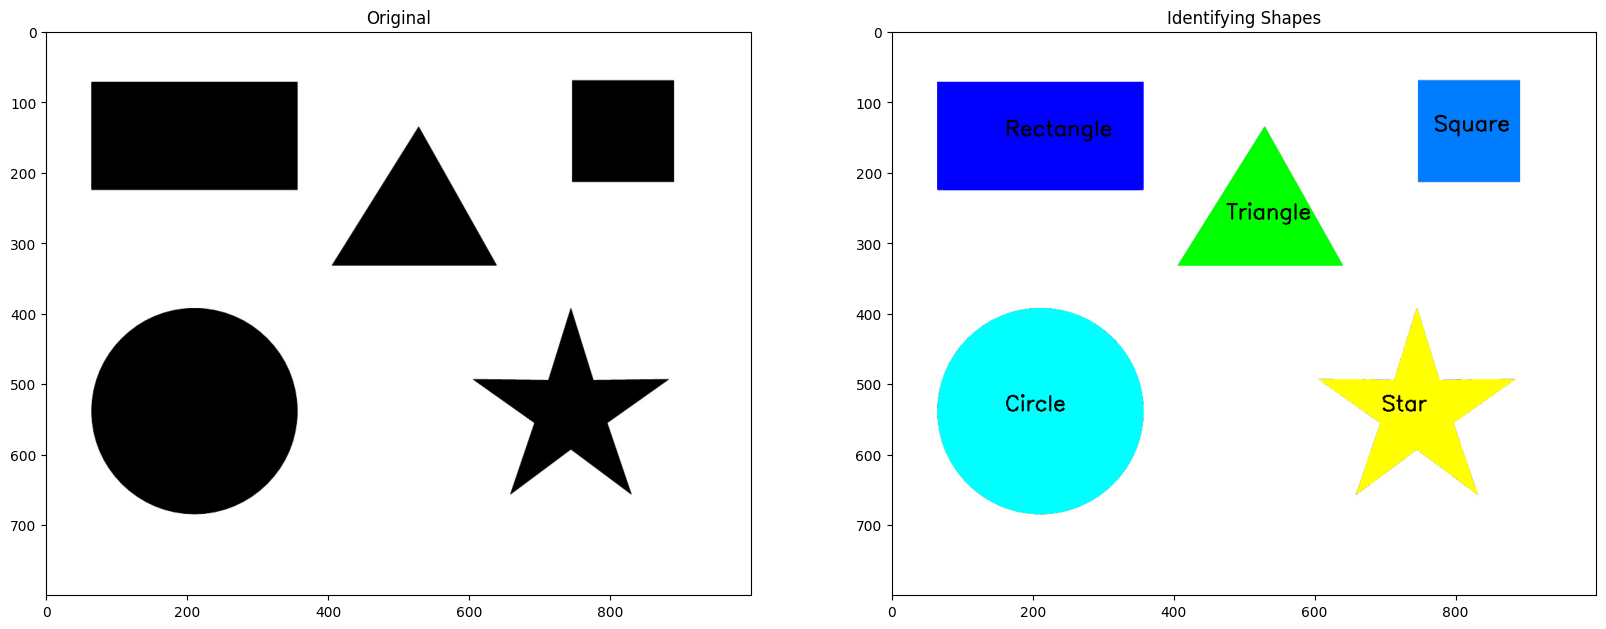

In [2]:
### 12.Identifiy Contours by Shape
### 12.형상으로 윤곽선 식별

import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("../Examples/someshapes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(image)

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# 윤곽선 추출
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    # 근사 다각형 가져오기
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image, [cnt], 0, (0,255,0), -1)
        
        # 중심에 텍스트를 배치할 윤곽선 중심 찾기
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # 4변 다각형이 정사각형인지 직사각형인지 확인
        # cv2.boundingRect는 왼쪽 상단과 너비를 반환
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # 중심에 텍스트를 배치할 윤곽선 중심 찾기
            cv2.drawContours(image, [cnt], 0, (0,125,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,0), 2)
        else:
            shape_name = "Rectangle"
            
            # 중심에 텍스트를 배치할 윤곽선 중심 찾기
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
            
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Identifying Shapes")
plt.imshow(image)